In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats
import scipy.io as io

plt.rc("font", family=["Helvetica", "Arial"]) #skifter skrifttype
plt.rc("axes", labelsize=18)   #skriftstørrelse af `xlabel` og `ylabel`
plt.rc("xtick", labelsize=16, direction="out")  #skriftstørrelse af ticks og viser ticks øverst
plt.rc("ytick", labelsize=16, direction="out")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16)

In [2]:
ns = np.loadtxt("/Users/karsten/Eksperimental/Experimentel-Physics-2/nList.txt")

In [3]:
n_arr = np.zeros(len(ns))
n_u_arr = np.zeros(len(ns))
for i, s in enumerate(ns):
    n_arr[i] = s[0]
    n_u_arr[i] = s[1]

In [39]:
nrep = 10000

nmean = np.zeros(nrep)

for i in range(nrep):
    nmean[i] = np.mean(n_arr[np.random.randint(len(n_arr),size=len(n_arr))])


meanN = np.mean(nmean)
alphaN = np.std(nmean, ddof=1)/np.sqrt(len(nmean))


bins1 = np.arange(min(nmean), max(nmean), 0.002) 

In [53]:
sortN = np.sort(nmean)
lint1 = sortN[int(0.025*len(sortN))] #2 sigma konfidens interval - Nedre
uint1 = sortN[int((0.025+0.95)*len(sortN))] # - Øvre

print(meanN)
print(lint1)
print(uint1)

x_plot = np.linspace(min(nmean), max(nmean), 3000)
norm = stats.norm.pdf(x_plot, loc=meanN, scale=np.std(nmean, ddof=1))*20
print(np.std(nmean, ddof=1))
print(alphaN)

1.5133902494504998
1.4345056407142855
1.6125600985714286
0.04595886359973055
0.0004595886359973055


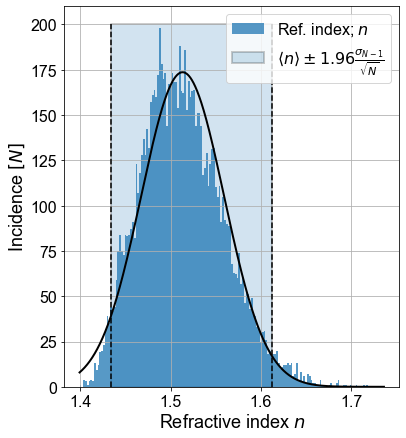

In [54]:
fig1, ax = plt.subplots(figsize=(6,7), sharey=True, gridspec_kw={"wspace": 0.02})
ax.set_ylabel(r"Incidence $[N]$")
ax.set_xlabel(r"Refractive index $n$")

ax.plot([lint1, lint1], [0, 200], '--' ,c='k')
ax.plot([uint1, uint1], [0, 200], '--' ,c='k')
ax.fill_between([lint1,uint1], 200, 0, color='C0', alpha=0.2, label=r'$\langle{n}\rangle \pm 1.96 \frac{\sigma_{N-1}}{\sqrt{N}}$', linewidth=2, edgecolor='k')
ax.hist(nmean, color='C0', alpha=0.75,bins=bins1, label=r"Ref. index; $n$")[0]
ax.plot(x_plot, norm, c='k', lw=2)
ax.grid()
ax.legend(loc='upper right')

In [49]:
#Bootstrappede middelværd. af n:
print(meanN)

1.5133902494504998


In [50]:
#Øvre og nedre grænse for 2sigma konfidens interval af n
print(lint1, uint1)

1.4345056407142855 1.6125600985714286


In [51]:
#Vi kan se at fordelingen er skubbet mod højre, så vi har stadig en gaussisk fordeling,
#Dog har vi noget data, som tyder på at vi har haft en tendens til at måle flere "høje" værdier af n, kontra små værdier
#af n.

#Kan have noget med kalibrering? Passer det med at 